# coba 44100 sr

In [1856]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import noisereduce as nr
from scipy.io import wavfile
from scipy import signal
from scipy.signal import get_window
import scipy.fftpack as fft

In [1857]:
# load
audio_file = "../Dataset/01.ha'/ha'_M2_11.wav"
# audio_file = "../Dataset/testing_rafi/rafi_Ha'.wav"
# audio_file = "../Dataset/Dataset_male/Ha'_M2_1.wav"
y , sr = librosa.load(audio_file, sr=44100)
# y = librosa.util.normalize(y)
# y = y/np.max(np.abs(y))
print(y.shape, sr)

(472752,) 44100


In [1858]:
# raw audio
ipd.Audio(y,rate=sr)

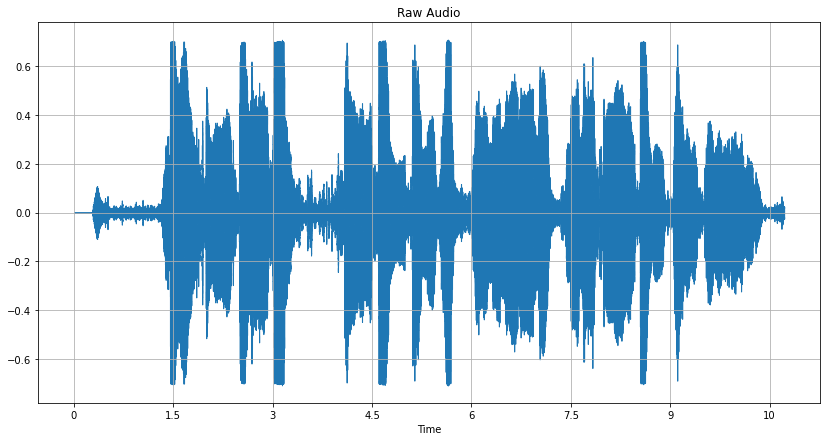

In [1859]:
# plot waveform
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y=y, sr=sr)
plt.grid(True)
plt.title('Raw Audio')
plt.show()

In [1860]:
# y= librosa.effects.preemphasis(y, coef=0.97)
# ipd.Audio(y, rate=sr)

In [1861]:
# # plot waveform  trimmed audio
# y_preemphasis = y
# fig = plt.figure(figsize=(14,7))
# fig.patch.set_facecolor('white')
# librosa.display.waveshow(y=y_preemphasis, sr=sr)
# plt.grid(True)
# plt.title('Normalized Splitted Reduce Noise Preemphasis Audio sr=44100')
# # plt.savefig('../hasil_gambar/trimmed_waveform_sr=48000.png')
# plt.show()

In [1862]:
print(max(y))
print(min(y))

0.71050096
-0.70268714


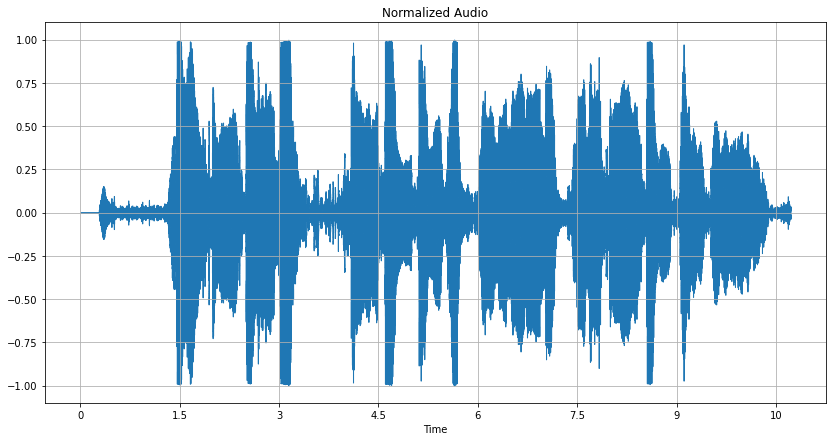

In [1863]:
y = y/np.max(np.abs(y))
# y = librosa.util.normalize(y)
# plot waveform
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y=y, sr=sr)
plt.grid(True)
plt.title('Normalized Audio')
plt.show()

In [1864]:
print(max(y))
print(min(y))

1.0
-0.9890024


In [1865]:
# normalize audio
ipd.Audio(y,rate=sr)

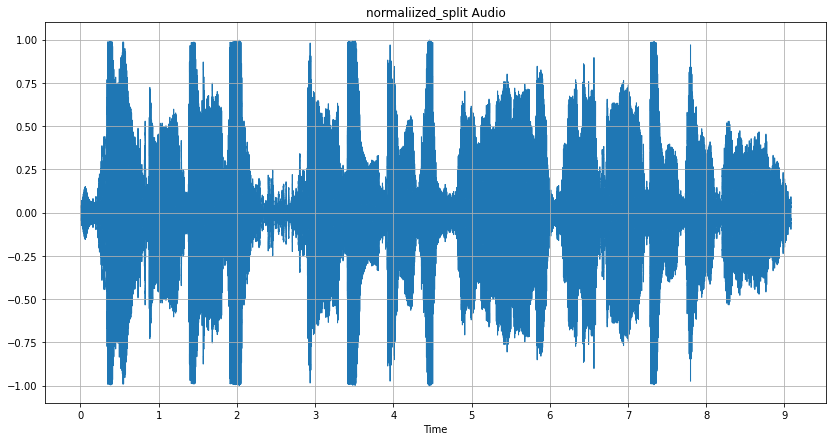

In [1866]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Menggunakan librosa untuk memuat audio
# audio_file = "../Dataset/01.Ha\'/Ha\'_M1_11.wav"
# y , sr = librosa.load(audio_file, sr=44100)
# y = y/np.max(np.abs(y))


# Memisahkan audio menjadi bagian-bagian berdasarkan energi
parts = librosa.effects.split(y, top_db=25, frame_length=1024, hop_length=512)

# # Menggabungkan bagian-bagian yang tidak diam
# y_non_silent = []
# for start, end in parts:
#     y_non_silent.extend(y[start:end])

# # Mengubah list menjadi array numpy
# y = np.array(y_non_silent)
# Menggabungkan bagian-bagian yang tidak diam menggunakan np.concatenate()
y = np.concatenate([y[start:end] for start, end in parts])

# # Menampilkan gambar gelombang audio
# plot waveform  trimmed audio
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y=y, sr=sr)
plt.grid(True)
plt.title('normaliized_split Audio')
plt.show()


In [1867]:
# splitted audio
ipd.Audio(y, rate=sr)

In [1868]:
# y= librosa.effects.preemphasis(y, coef=0.95)
# ipd.Audio(y, rate=sr)

In [1869]:
print(max(y))
print(min(y))

1.0
-0.9890024


In [1870]:
# noise reduce
y = nr.reduce_noise(y=y, sr=sr, prop_decrease=0.8)
# wavfile.write("../sample_audio/Ha'_split_reduced_noise_44100hz.wav", sr, y)
print(sr, y.shape)

44100 (400384,)


In [1871]:
print(max(y))
print(min(y))

0.9188955
-0.94028264


In [1872]:
# reduce noise
ipd.Audio(y,rate=44100)

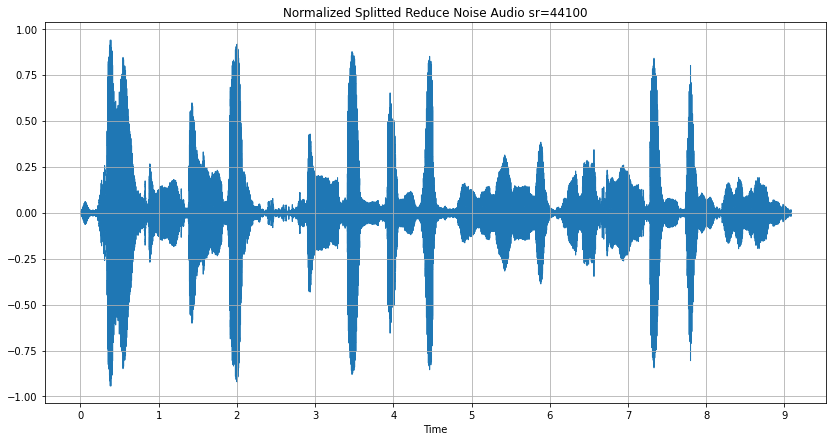

In [1873]:
# plot waveform  trimmed audio
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y=y, sr=sr)
plt.grid(True)
plt.title('Normalized Splitted Reduce Noise Audio sr=44100')
# plt.savefig('../hasil_gambar/trimmed_waveform_sr=48000.png')
plt.show()

In [1874]:
# y = y/np.max(np.abs(y))
# # y = librosa.util.normalize(y)
# # plot waveform
# fig = plt.figure(figsize=(14,7))
# fig.patch.set_facecolor('white')
# librosa.display.waveshow(y=y, sr=sr)
# plt.grid(True)
# plt.title('Normalized Audio')
# plt.show()

In [1875]:
# # normalize audio
# ipd.Audio(y,rate=44100)

In [1876]:
y_preemphasis = librosa.effects.preemphasis(y,coef=0.97)
ipd.Audio(y_preemphasis, rate=sr)

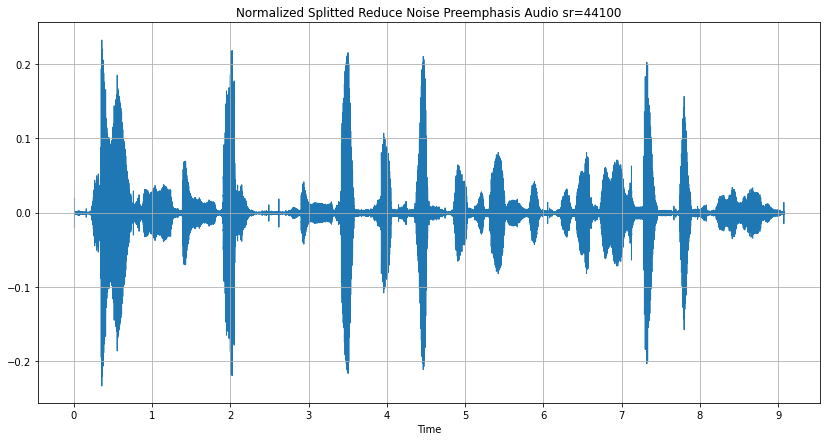

In [1877]:
# plot waveform  trimmed audio
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y=y_preemphasis, sr=sr)
plt.grid(True)
plt.title('Normalized Splitted Reduce Noise Preemphasis Audio sr=44100')
# plt.savefig('../hasil_gambar/trimmed_waveform_sr=48000.png')
plt.show()

In [1878]:
X = librosa.util.frame(y, frame_length=1024, hop_length=512)
X = X.T

In [1879]:
# hop_size = 10 #ms
FFT_size = 1024
index_frame = 20

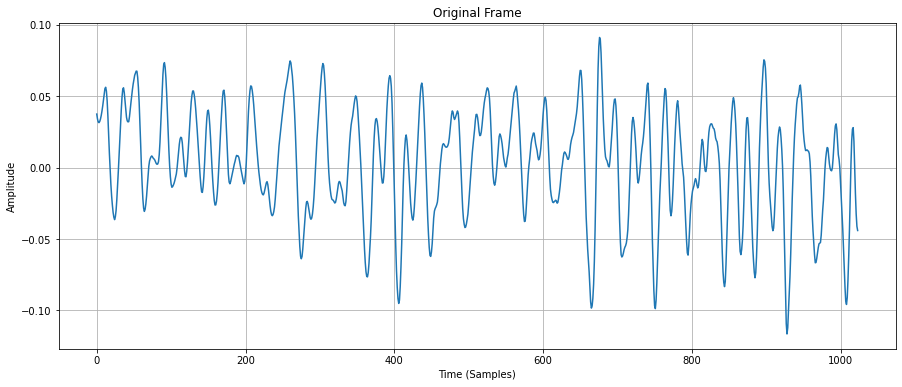

In [1880]:
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('white')
plt.plot(X[index_frame])
plt.title('Original Frame')
plt.xlabel('Time (Samples)')  # Menambah label sumbu x
plt.ylabel('Amplitude')  # Menambah label sumbu y
plt.grid(True)
plt.show()

In [1881]:
window = get_window('hamming', 1024, fftbins=True)

# Reshape so that the window can be broadcast
# window = window.reshape((-1, 1))

y = window * X

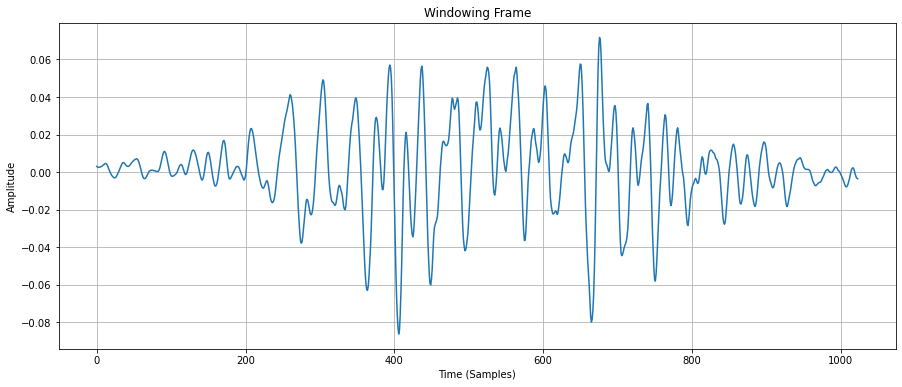

In [1882]:
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('white')
plt.plot(y[index_frame])
plt.title('Windowing Frame')
plt.xlabel('Time (Samples)')  # Menambah label sumbu x
plt.ylabel('Amplitude')  # Menambah label sumbu y
plt.grid(True)
plt.show()

In [1883]:
audio_winT = np.transpose(y)

audio_fft = np.empty((int(1 + FFT_size // 2), audio_winT.shape[1]), dtype=np.complex64, order='F')

for n in range(audio_fft.shape[1]):
    audio_fft[:, n] = fft.fft(audio_winT[:, n], axis=0)[:audio_fft.shape[0]]

audio_fft = np.transpose(audio_fft)

In [1884]:
y = np.square(np.abs(audio_fft))

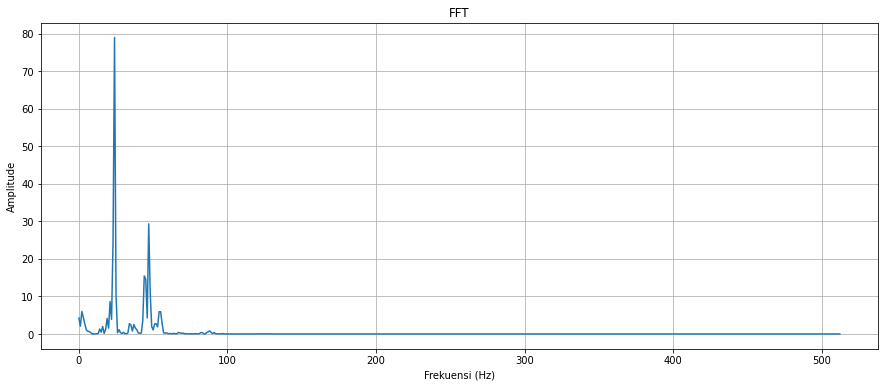

In [1885]:
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('white')
plt.plot(y[index_frame])
plt.title('FFT')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

ValueError: too many values to unpack (expected 2)

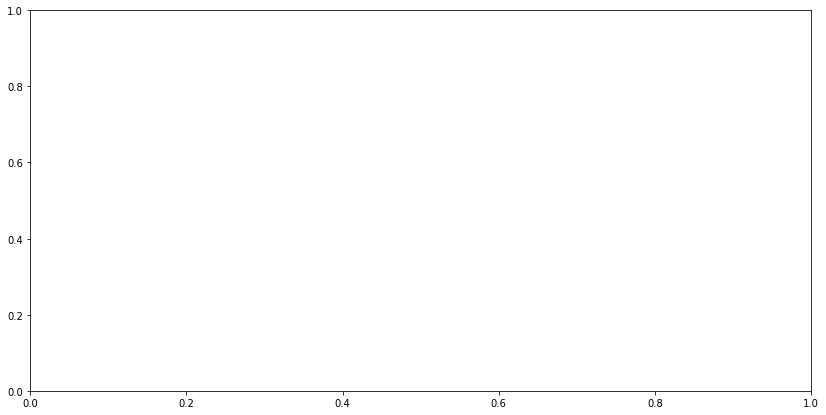

In [1886]:
y_melspec = y
S = librosa.feature.melspectrogram(y=y_melspec, sr=sr, n_mels=20,n_fft=1024, hop_length=512, win_length=1024, window='hamming')
S_db = librosa.power_to_db(S, ref=np.max)
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
# plt.savefig('../hasil_gambar/nonmic_ha_melspectogram.png')
plt.show()


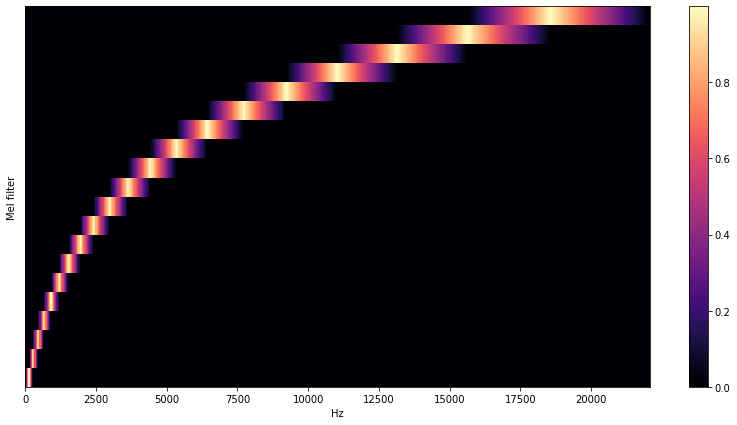

In [1888]:
y_mel = y
mel = librosa.filters.mel(sr=44100, n_mels=20,n_fft=1024, htk=True, norm=None)
# S_db = librosa.power_to_db(S, ref=np.max)
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.specshow(mel, sr=sr, hop_length=512, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.show()

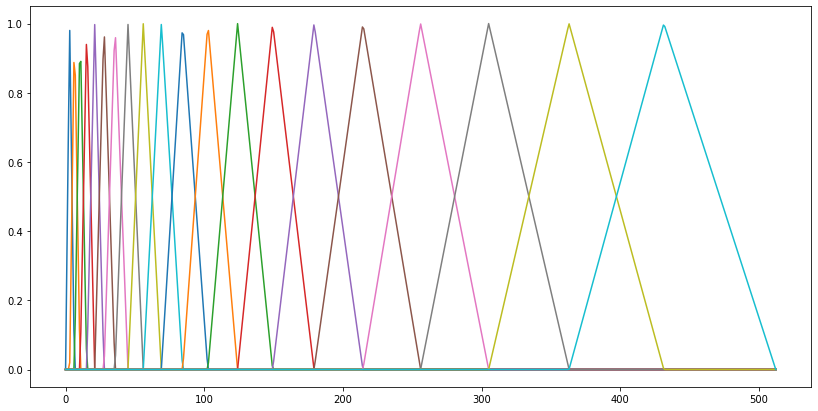

In [1889]:
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
plt.plot(mel.T)
plt.show()

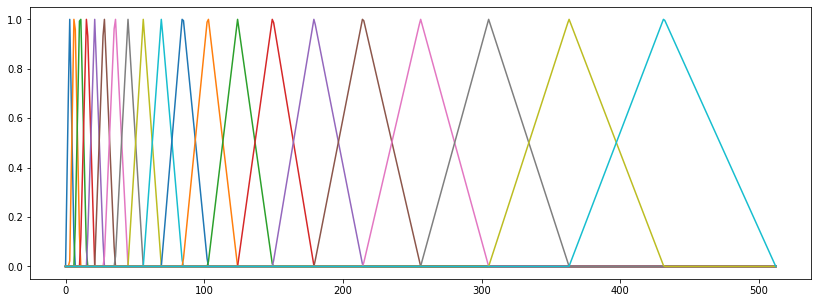

In [ ]:
mel /= np.max(mel, axis=-1)[:, None]
fig = plt.figure(figsize=(14,5))
fig.patch.set_facecolor('white')
plt.plot(mel.T)
plt.show()

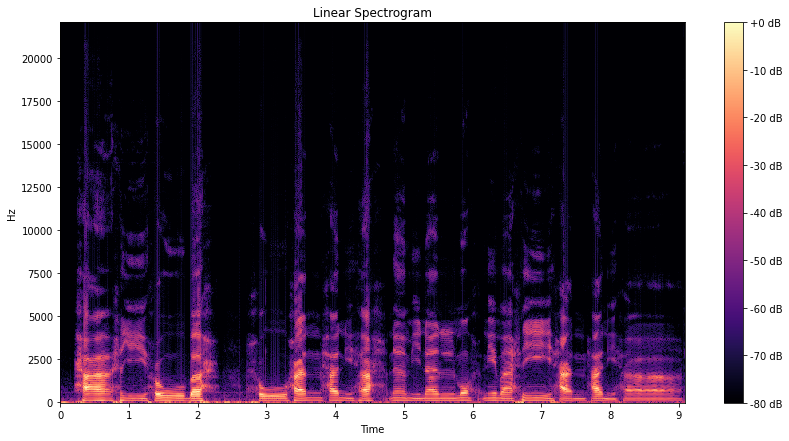

In [ ]:
y_linspec=y
D = librosa.amplitude_to_db(np.abs(librosa.stft(y_linspec, n_fft=1024, hop_length=512, win_length=1024, window='hamming')),ref=np.max)
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear Spectrogram')
plt.savefig('../hasil_gambar/nonmic_ha_linearspectogram.png')
plt.show()

In [ ]:
# from scipy.signal import butter, lfilter
# # Function to apply bandpass filter
# def bandpass_filter(data, lowcut, highcut, fs, order):
#     nyquist = 0.5 * fs
#     low = lowcut / nyquist
#     high = highcut / nyquist
#     b, a = butter(order, [low, high], btype='band')
#     y_filtered = lfilter(b, a, data)
#     return y_filtered

In [ ]:
# # Bandpass filter parameters
# lowcut = 100.0  # Low cutoff frequency
# highcut = 2000.0  # High cutoff frequency
# order = 5  # Filter order

# # Apply bandpass filter to the audio
# y_filtered = bandpass_filter(y, lowcut, highcut, sr, order)

In [ ]:
# print(max(y_filtered))
# print(min(y_filtered))

In [ ]:
# y_filtered = y_filtered/np.max(np.abs(y_filtered))
# print(max(y_filtered))
# print(min(y_filtered))

In [ ]:
# # Plot the original and filtered waveforms
# fig = plt.figure(figsize=(14,7))
# fig.patch.set_facecolor('white')
# plt.plot(np.arange(len(y)) / sr, y, label='Original')
# plt.plot(np.arange(len(y_filtered)) / sr, y_filtered, label='Filtered')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.title('Original and Filtered Waveforms')
# plt.legend()
# plt.show()

In [ ]:
# # Plot the spectrograms
# fig = plt.figure(figsize=(14,7))
# fig.patch.set_facecolor('white')
# plt.subplot(2, 1, 1)
# librosa.display.waveshow(y, sr=sr)
# plt.title('Original Audio Waveform')

# plt.subplot(2, 1, 2)
# librosa.display.waveshow(y_filtered, sr=sr)
# plt.title('Filtered Audio Waveform')

# plt.tight_layout()
# plt.show()

In [ ]:
# y_mel = y_filtered
# S = librosa.feature.melspectrogram(y=y_mel, sr=sr, n_mels=128)
# S_db = librosa.power_to_db(S, ref=np.max)
# fig = plt.figure(figsize=(14,7))
# fig.patch.set_facecolor('white')
# librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Mel Spectrogram')
# plt.savefig('../hasil_gambar/nonmic_ha_melspectogram_bandpass.png')
# plt.show()

In [ ]:
# y_linspec = y_filtered
# D = librosa.amplitude_to_db(np.abs(librosa.stft(y_linspec)),ref=np.max)
# fig = plt.figure(figsize=(14,7))
# fig.patch.set_facecolor('white')
# librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Linear Spectrogram')
# plt.savefig('../hasil_gambar/nonmic_ha_linearspectogram_bandpass.png')
# plt.show()

In [ ]:
# wavfile.write("../sample_audio/m2_Ha'_normalized_split_reduced_noise_bandpass_44100hz_1.wav", 44100, y_filtered)
# ipd.Audio(y_filtered, rate=44100)

PITCH

In [ ]:
# #  Menentukan target pitch
# target_pitch = 440  # Misalnya, A4

# # Menghitung pitch audio asli
# pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

# # Menghitung pitch rata-rata
# mean_pitch = np.mean(pitches[pitches > 0])

# # Menghitung faktor skala pitch
# pitch_scale_factor = target_pitch / mean_pitch

# # Menyesuaikan pitch audio
# y = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=np.log2(pitch_scale_factor))

# fig = plt.figure(figsize=(14,7))
# fig.patch.set_facecolor('white')
# librosa.display.waveshow(y=y, sr=sr)
# plt.grid(True)
# plt.title('PITCH AUDIO')
# # plt.savefig('../hasil_gambar/trimmed_waveform_sr=48000.png')
# plt.show()

In [ ]:
# wavfile.write("../sample_audio/m1_Ha'_split_reduced_noise_shift_pitch_44100hz_2.wav", sr, y)

In [ ]:
# ipd.Audio("../sample_audio/m1_Ha'_split_reduced_noise_shift_pitch_44100hz_2.wav")